# Principal Component Analysis :- 30 years CAD Interest Rate in London International Banking Offerd Rate (LIBOR) 

## This project demonstrate principal component analysis of interest rates using R in time-series data. 

### What is PCA?  
 Principal component analysis is frequently used to capture the variability in the movement of interest rates along the term structure. Understanding the varability allows for creation of stressed interest rate term structures that can be applied as part of a risk management program wherever the uncertainty of interest rates is a concern. Varying degrees of stress can be applied in the fashion of analytical Value-at-Risk (VaR) techniques.

## Interest Rate Data Sources
LIBOR interest rate data is obtained for the 1-12 months maturty terms. The source of the data is the Federal Reserve Bank of St. Louis and is pulled via "quantmod".

## R Libraries
 This project utilizes xts, quantmod, ggplot2, and reshape2 packages. The xts package is useful for storing time series data while quantmod allows for reading data. The latter is especially helpful for reading LIBOR data from the source.The ggplot2 package is a well known plotting package used to generate the graphs. 

In [75]:
library(quantmod)
library(fitdistrplus)
library(corrplot)
library(ggplot2)
library(data.table)
library(caTools)
library(devtools)
library(xts)
library(zoo)
library(ggcorrplot)
getSymbols.warning4.0 =FALSE
warning.message= FALSE

### Load LIBOR data:- For all maturities / tenors

In [5]:
Tenors = 1:12
NumTenors = length(Tenors)
for (Currency in c("CAD")) {
  VarName = paste(Currency,"LIBOR", sep="_")
  #////////////////////////////////////////////////////////////////////////////// 
  for (t in 1:NumTenors) {
    
    if (Tenors[t] < 10) {
      
      symbol = paste(Currency, Tenors[t],"MTD156N", sep="") 
    } else symbol = paste(Currency,Tenors[t],"MD156N", sep="") 
    #////////////////////////////////////////////////////////////////////////////////    
    getSymbols(Symbols = symbol, src = "FRED")
    DF <- na.omit(data.frame(get(symbol)))
    DF$Date = row.names(DF)
    #//////////////////////////////////////////////////////////////////////////    
    if (t == 1) {
      assign(VarName, DF)
    } else {
      assign(VarName, merge(get(VarName), DF, by="Date"))
    }
    cat(symbol, "is done\n")
    rm(list = c(symbol))
  } 
}
rm(DF)

CAD1MTD156N is done
CAD2MTD156N is done
CAD3MTD156N is done
CAD4MTD156N is done
CAD5MTD156N is done
CAD6MTD156N is done
CAD7MTD156N is done
CAD8MTD156N is done
CAD9MTD156N is done
CAD10MD156N is done
CAD11MD156N is done
CAD12MD156N is done


In [72]:
# choosing for selected tenors (1month, 3 months, 6 months, 12 months)
sel_tenor = c("CADONTD156N","CAD1WKD156N","CAD1MTD156N","CAD3MTD156N","CAD6MTD156N","CAD12MD156N")
getSymbols(sel_tenor, src = "FRED")
CADSymbolsbined <-cbind(CAD1MTD156N,CAD3MTD156N,CAD6MTD156N,CAD12MD156N)
sel_CAD = na.approx(CADSymbolsbined)

[1] "CADONTD156N" "CAD1WKD156N" "CAD1MTD156N" "CAD3MTD156N" "CAD6MTD156N"
[6] "CAD12MD156N"

In [6]:
#View the structure and summary of the CAD_data
summary(CAD_LIBOR)

     Date            CAD1MTD156N       CAD2MTD156N       CAD3MTD156N     
 Length:5831        Min.   : 0.2917   Min.   : 0.3483   Min.   : 0.3983  
 Class :character   1st Qu.: 2.5467   1st Qu.: 2.5567   1st Qu.: 2.6033  
 Mode  :character   Median : 4.0469   Median : 4.0625   Median : 4.1094  
                    Mean   : 4.1104   Mean   : 4.1540   Mean   : 4.1984  
                    3rd Qu.: 5.1875   3rd Qu.: 5.2461   3rd Qu.: 5.2792  
                    Max.   :13.9375   Max.   :13.8750   Max.   :13.8750  
  CAD4MTD156N       CAD5MTD156N       CAD6MTD156N       CAD7MTD156N     
 Min.   : 0.4983   Min.   : 0.5983   Min.   : 0.6933   Min.   : 0.7867  
 1st Qu.: 2.6192   1st Qu.: 2.6471   1st Qu.: 2.6725   1st Qu.: 2.6950  
 Median : 4.1850   Median : 4.2142   Median : 4.2344   Median : 4.2467  
 Mean   : 4.2390   Mean   : 4.2797   Mean   : 4.3202   Mean   : 4.3597  
 3rd Qu.: 5.3125   3rd Qu.: 5.3708   3rd Qu.: 5.4223   3rd Qu.: 5.4844  
 Max.   :13.7656   Max.   :13.7031   Max.   

## Creating Time-Series data

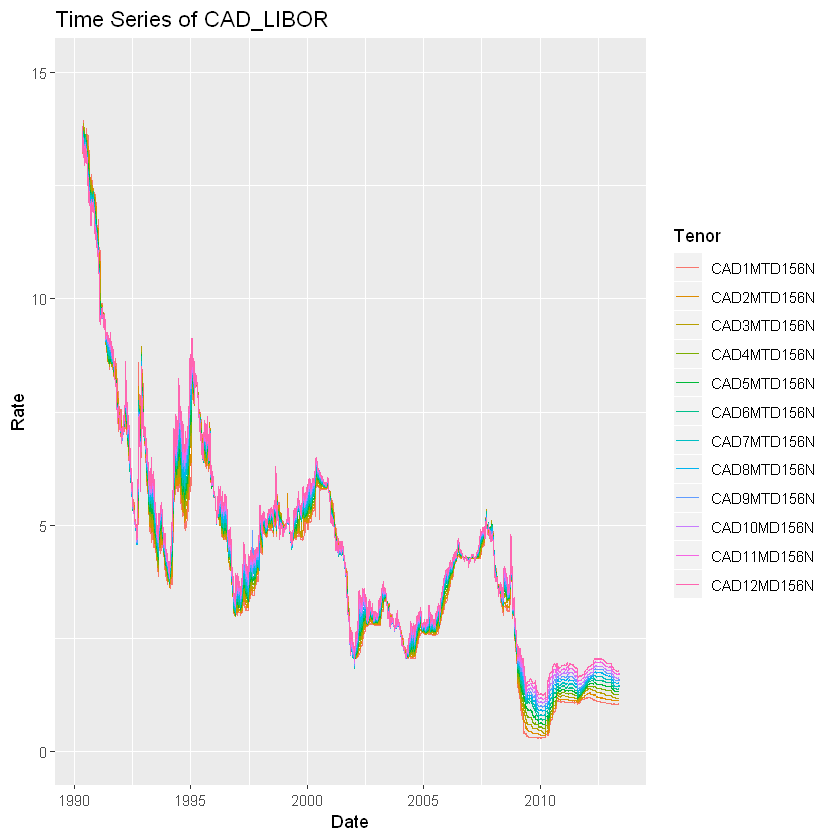

In [15]:
xts_CAD <- xts(x=CAD_LIBOR[,-1], order.by= as.Date(CAD_LIBOR[,1]))
#now we need to stack the all attribute 
library(Stack)
temp_CAD= data.frame(index(xts_CAD),stack(as.data.frame(coredata(xts_CAD))))
names(temp_CAD)[1]= "Date"
names(temp_CAD)[2]= "Rate"
names(temp_CAD)[3]= "Tenor"
pCAD=ggplot(temp_CAD, aes(x=Date, y= Rate, color=Tenor))+ geom_line() +ylim(0,15)+ ggtitle("Time Series of CAD_LIBOR") 
pCAD

## 30 days increment ( using lag and 21 working days)

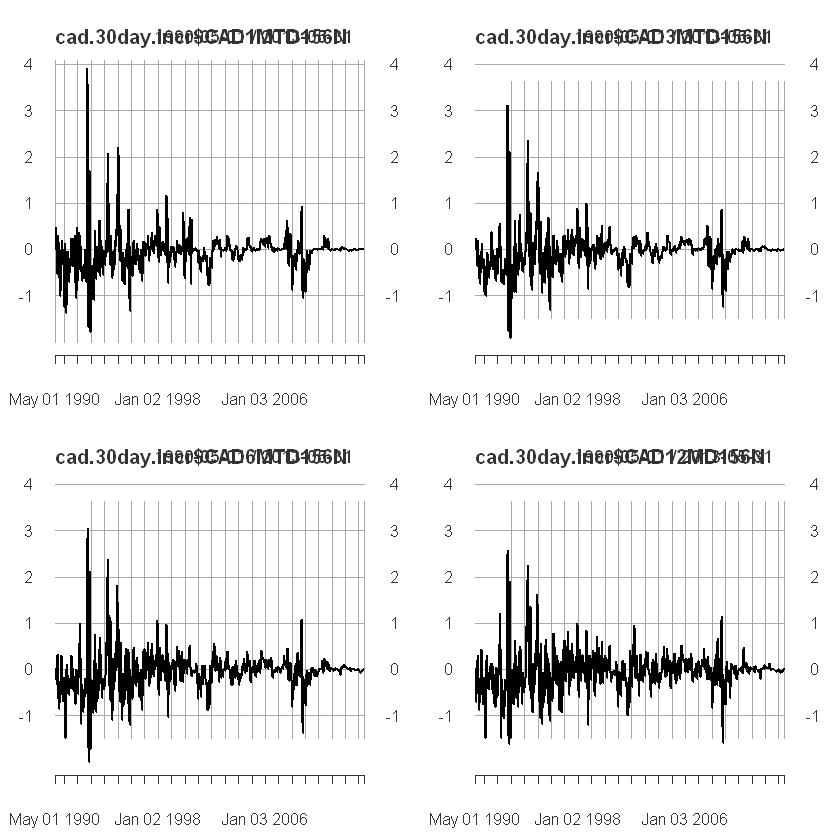

In [47]:
cad.30day.incr <- diff(sel_CAD, lag=21, differences = 1)
cad.30day.incr[is.na(cad.30day.incr)] <- 0
par(mfrow=c(2,2))
plot(cad.30day.incr$CAD1MTD156N, ylim=c(-2,4.1))
plot(cad.30day.incr$CAD3MTD156N, ylim=c(-2,4.1))
plot(cad.30day.incr$CAD6MTD156N, ylim=c(-2,4.1))
plot(cad.30day.incr$CAD12MD156N, ylim=c(-2,4.1))

# Correlation between terms/ maturities 

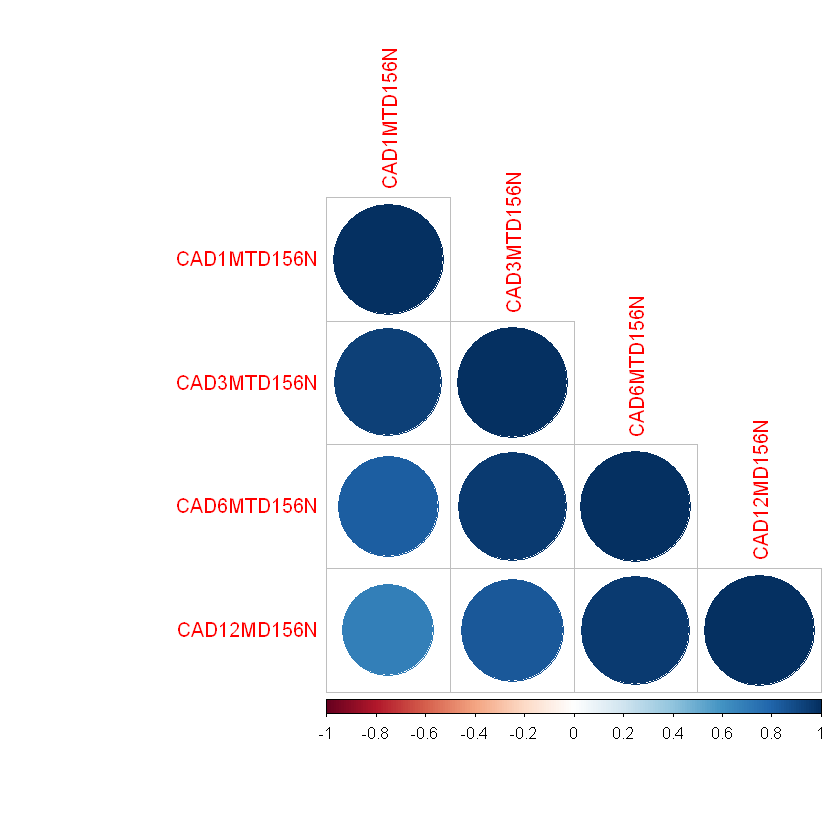

In [69]:
# correlation between different tenurs
par(mfrow=c(1,1))
A<-cor(na.omit(cad.30day.incr))
corrplot(A, type = "lower")

# Yeild Curve/ term structure calculation

Warning message in avg - sdev:
"longer object length is not a multiple of shorter object length"Warning message in avg + sdev:
"longer object length is not a multiple of shorter object length"

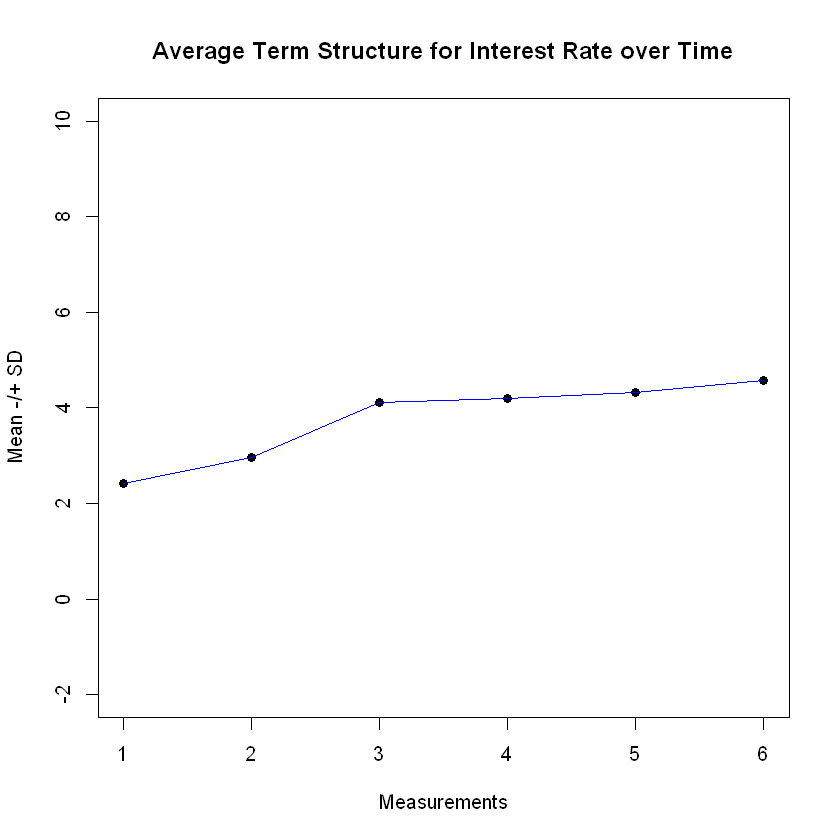

In [84]:
# selecting few tem of strucutres
b1a=mean(na.omit(CADONTD156N))
b1b=mean(na.omit(CAD1WKD156N))

b1=mean(na.omit(CADSymbolsbined$CAD1MTD156N))
b2=mean(na.omit(CADSymbolsbined$CAD3MTD156N))
b3=mean(na.omit(CADSymbolsbined$CAD6MTD156N))
b4=mean(na.omit(CADSymbolsbined$CAD12MD156N))

c1=apply(CADSymbolsbined$CAD1MTD156N,2,sd)
c2=apply(CADSymbolsbined$CAD3MTD156N,2,sd)
c3=apply(CADSymbolsbined$CAD6MTD156N,2,sd)
c4=apply(CADSymbolsbined$CAD12MD156N,2,sd)

x= c(1,2,3,4,5,6)
avg= c(b1a,b1b,b1,b2,b3,b4)
sdev = c(c1,c2,c3,c4)

plot(x, avg, ylim=(c(-2, 10)),pch=19, xlab="Measurements", ylab="Mean -/+ SD",
    main="Average Term Structure for Interest Rate over Time")

arrows(x, avg-sdev, x, avg + sdev, length=0.05, angle=90, code=3)
lines((avg), col="blue") 

[1] "data.frame"

Importance of components:
                          PC1     PC2     PC3     PC4
Standard deviation     1.8991 0.59151 0.18257 0.10019
Proportion of Variance 0.9017 0.08747 0.00833 0.00251
Cumulative Proportion  0.9017 0.98916 0.99749 1.00000

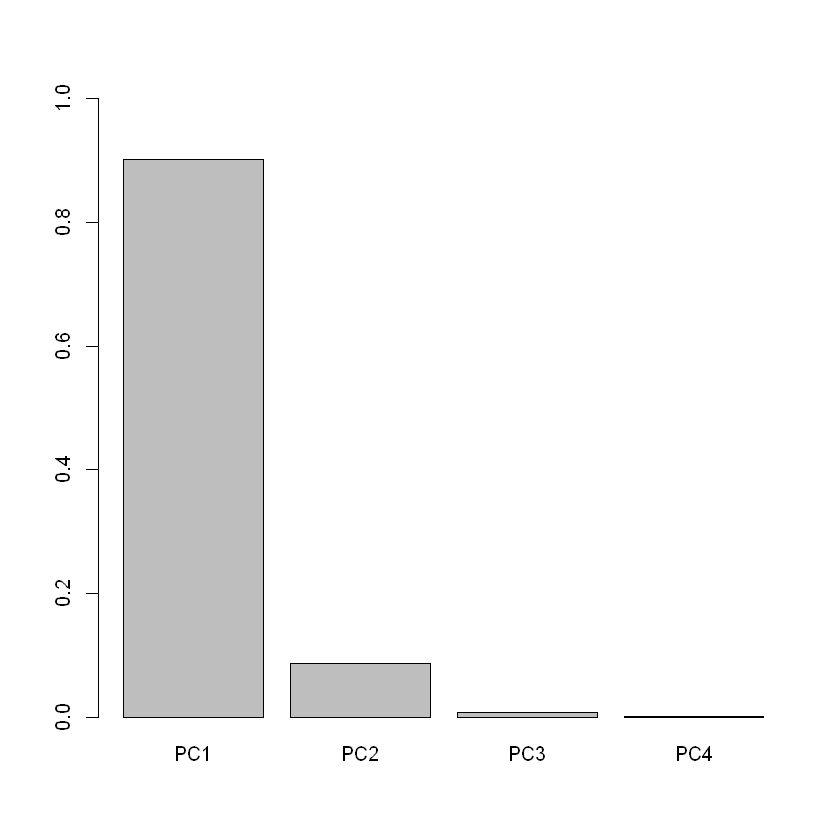

In [77]:
CADPCA = na.omit(cad.30day.incr[-c(1,2),])

x=as.xts(CADPCA, dateFormat= 'Date')
df=fortify.zoo(x)
class(df)

df.pca=prcomp(df[,c(2:5)],  scale. = TRUE)
summary(df.pca)
#  str(mydf.pca)
#plot(mydf.pca,ylim=c(0,1))
t = summary(df.pca)
barplot(t[["importance"]][2,], ylim=c(0,1))
# plot(df.pca)
# ggbiplot(df.pca, ellipse=TRUE, circle=TRUE)

#a = plot(df.pca, obs.scale = 1, var.scale = 1,  ellipse = TRUE, circle = TRUE)
#a= a + scale_color_discrete(name = 'Hello')
#a= a + theme(legend.direction = 'horizontal', legend.position = 'top')
# print(a)

#matplot(df.pca$rotation[,1:3], type='dot')

#Therefore the variance explained by the first 3 Principle Components is 99.75%

In [78]:
library(devtools)
install_github("vqv/ggbiplot")

Skipping install of 'ggbiplot' from a github remote, the SHA1 (7325e880) has not changed since last install.
  Use `force = TRUE` to force installation


In [79]:
df.pca

Standard deviations (1, .., p=4):
[1] 1.8991422 0.5915144 0.1825709 0.1001872

Rotation (n x k) = (4 x 4):
                   PC1        PC2        PC3        PC4
CAD1MTD156N -0.4779788 -0.6910130  0.5061338  0.1945917
CAD3MTD156N -0.5185590 -0.2160462 -0.5455720 -0.6219098
CAD6MTD156N -0.5177036  0.2545578 -0.4124288  0.7050431
CAD12MD156N -0.4843716  0.6411126  0.5254354 -0.2797793

In [82]:
library(ggbiplot)

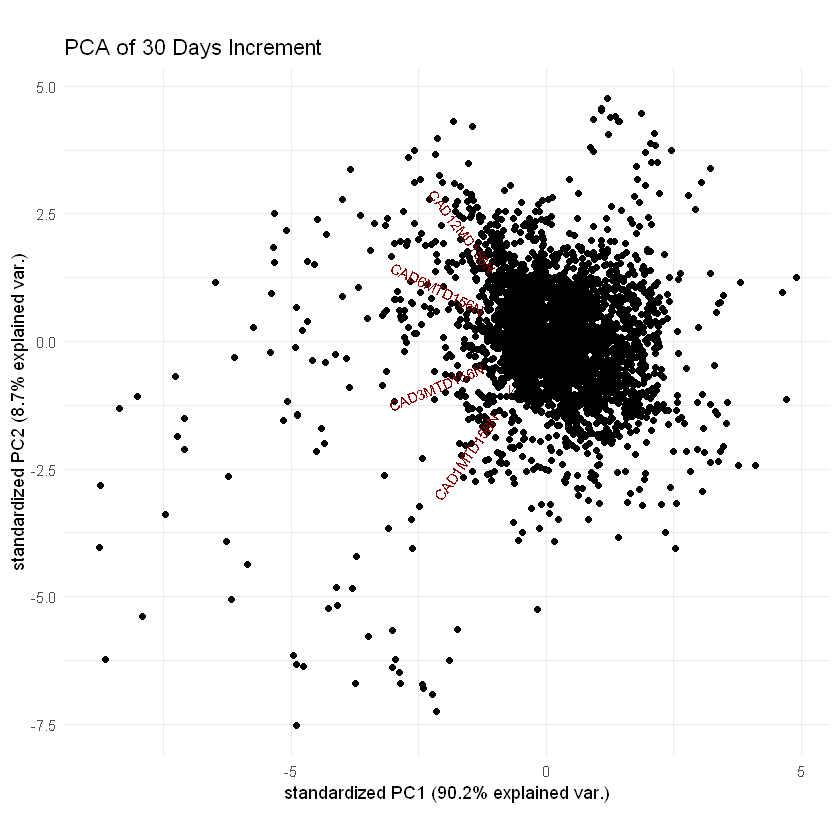

In [81]:
ggbiplot(df.pca,ellipse=FALSE, bs.scale = 0, var.scale = 0,  labels=rownames(df.pca))+
  ggtitle("PCA of 30 Days Increment")+
  theme_minimal()+
  theme(legend.position = "bottom")


### 8.3 Principal Component Interpretation
In this section the sign of the key principal components are changed to align with interpretations :
1) the first principal component is highly correlated with the rates of all maturities and the correlations
2) the second principal component is negatively correlated with short-maturity rates and positively correlated with long-maturity series. This allows for an interpretation of the second principal component as a factor that tilts the term structure (“steepness”)
